# Diwali Sales Analysis Report

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')
data.shape

(11251, 15)

In [3]:
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [6]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data['Amount']=data['Amount'].astype('int')

In [9]:
data["Amount"].dtype

dtype('int32')

In [10]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
data.rename(columns={"Marital_Status":"Marital Status", "Product_Category":"Product Category"})
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [12]:
data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

# Gender

In [13]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

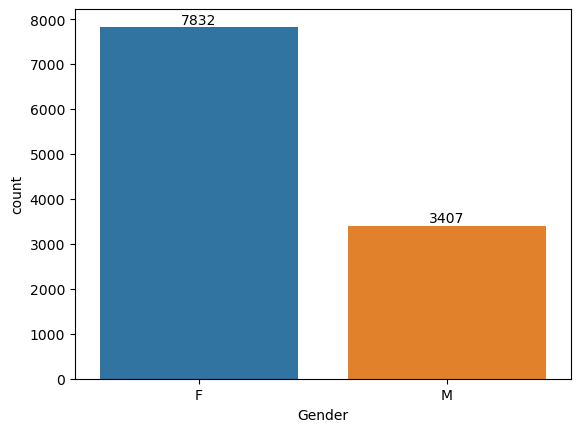

In [14]:
ax = sns.countplot(data=data, x='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

In [15]:
sales_gen=data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


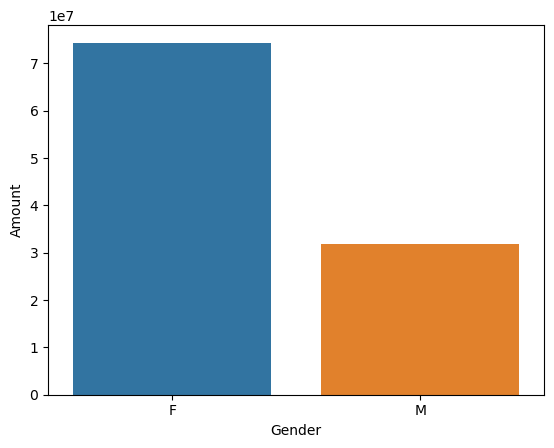

In [16]:
sns.barplot(data=sales_gen,
           x='Gender',
            y='Amount'
           )

plt.show()

# Age

In [17]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

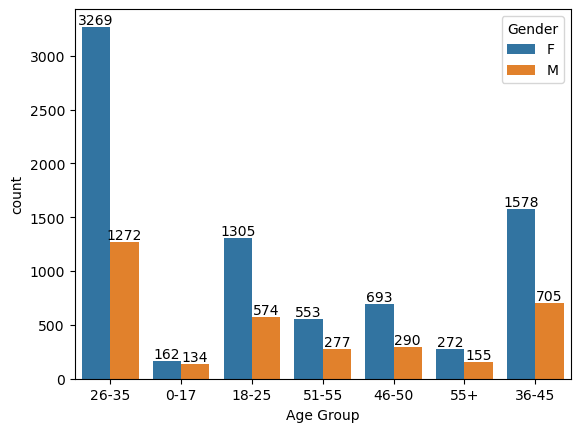

In [18]:
ax = sns.countplot(data=data,
              x="Age Group",
             hue="Gender"
             )
for bars in ax.containers:
    ax.bar_label(bars)

In [20]:
group_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
group_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


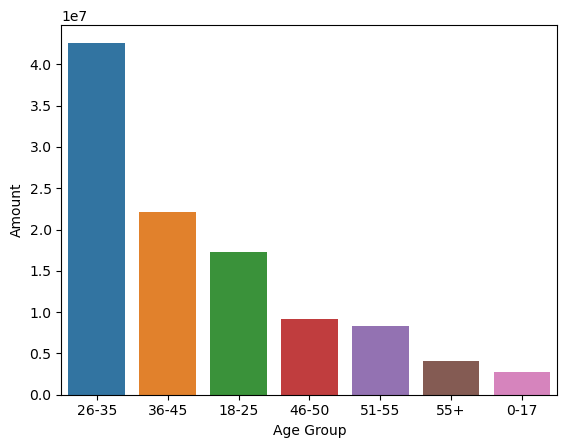

In [26]:
sns.barplot(data=group_age,
           x="Age Group",
            y="Amount"
           )
plt.show()

# Top 10 States 

In [28]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

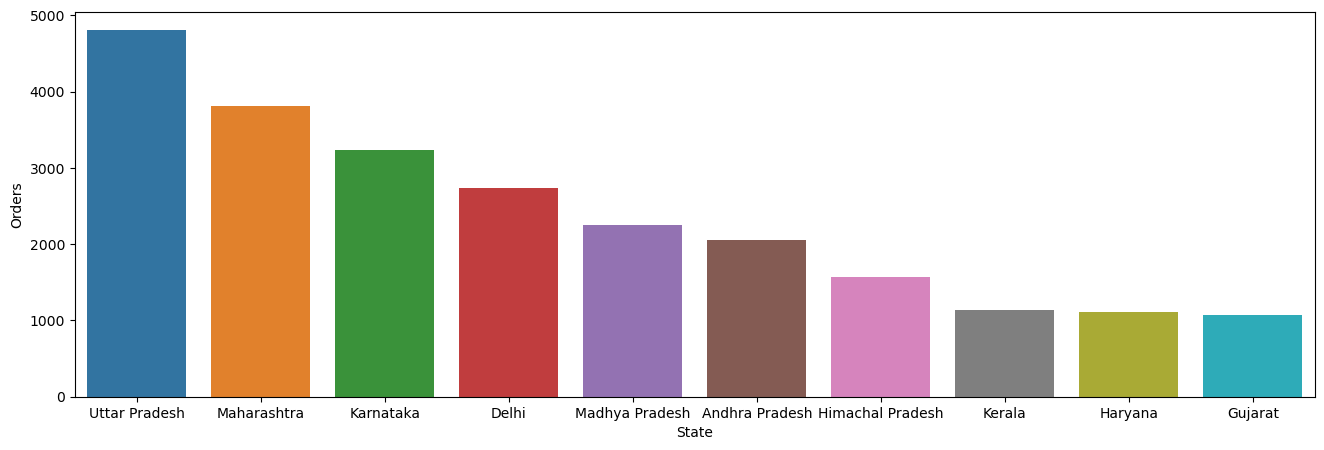

In [46]:
group_state = data.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
plt.figure(figsize=(16,5))
sns.barplot(data=group_state,
           x="State",
            y="Orders"
           )
plt.show()

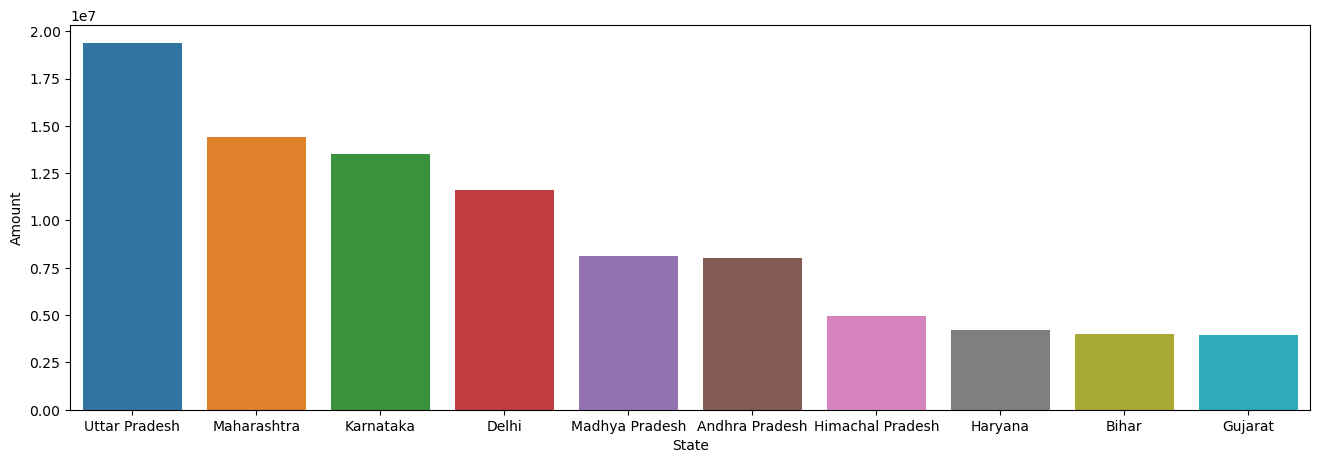

In [48]:
group_state = data.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
plt.figure(figsize=(16,5))
sns.barplot(data=group_state,
           x="State",
            y="Amount"
           )
plt.show()

# Marital Status

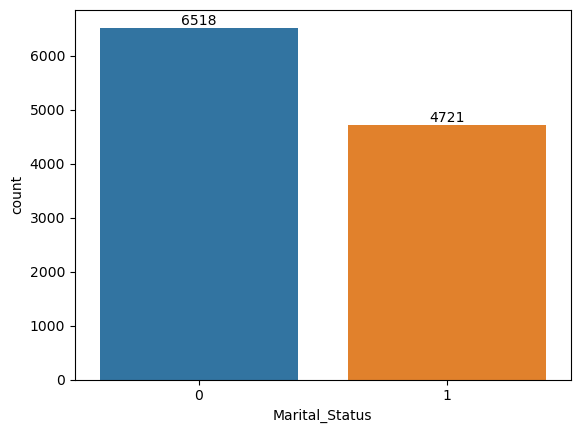

In [49]:
ax = sns.countplot(data=data,
                  x="Marital_Status"
                  )
for bar in ax.containers:
    ax.bar_label(bar)

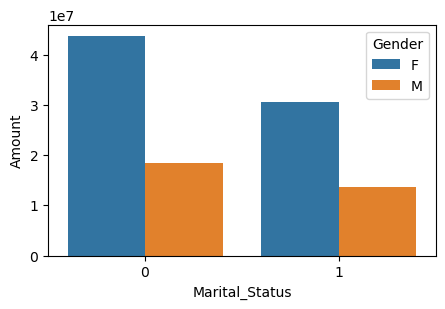

In [53]:
sales_state = data.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
plt.figure(figsize=(5,3))
sns.barplot(data=sales_state,
           x="Marital_Status",
            y="Amount",
            hue="Gender"
           )
plt.show()

# Occupation

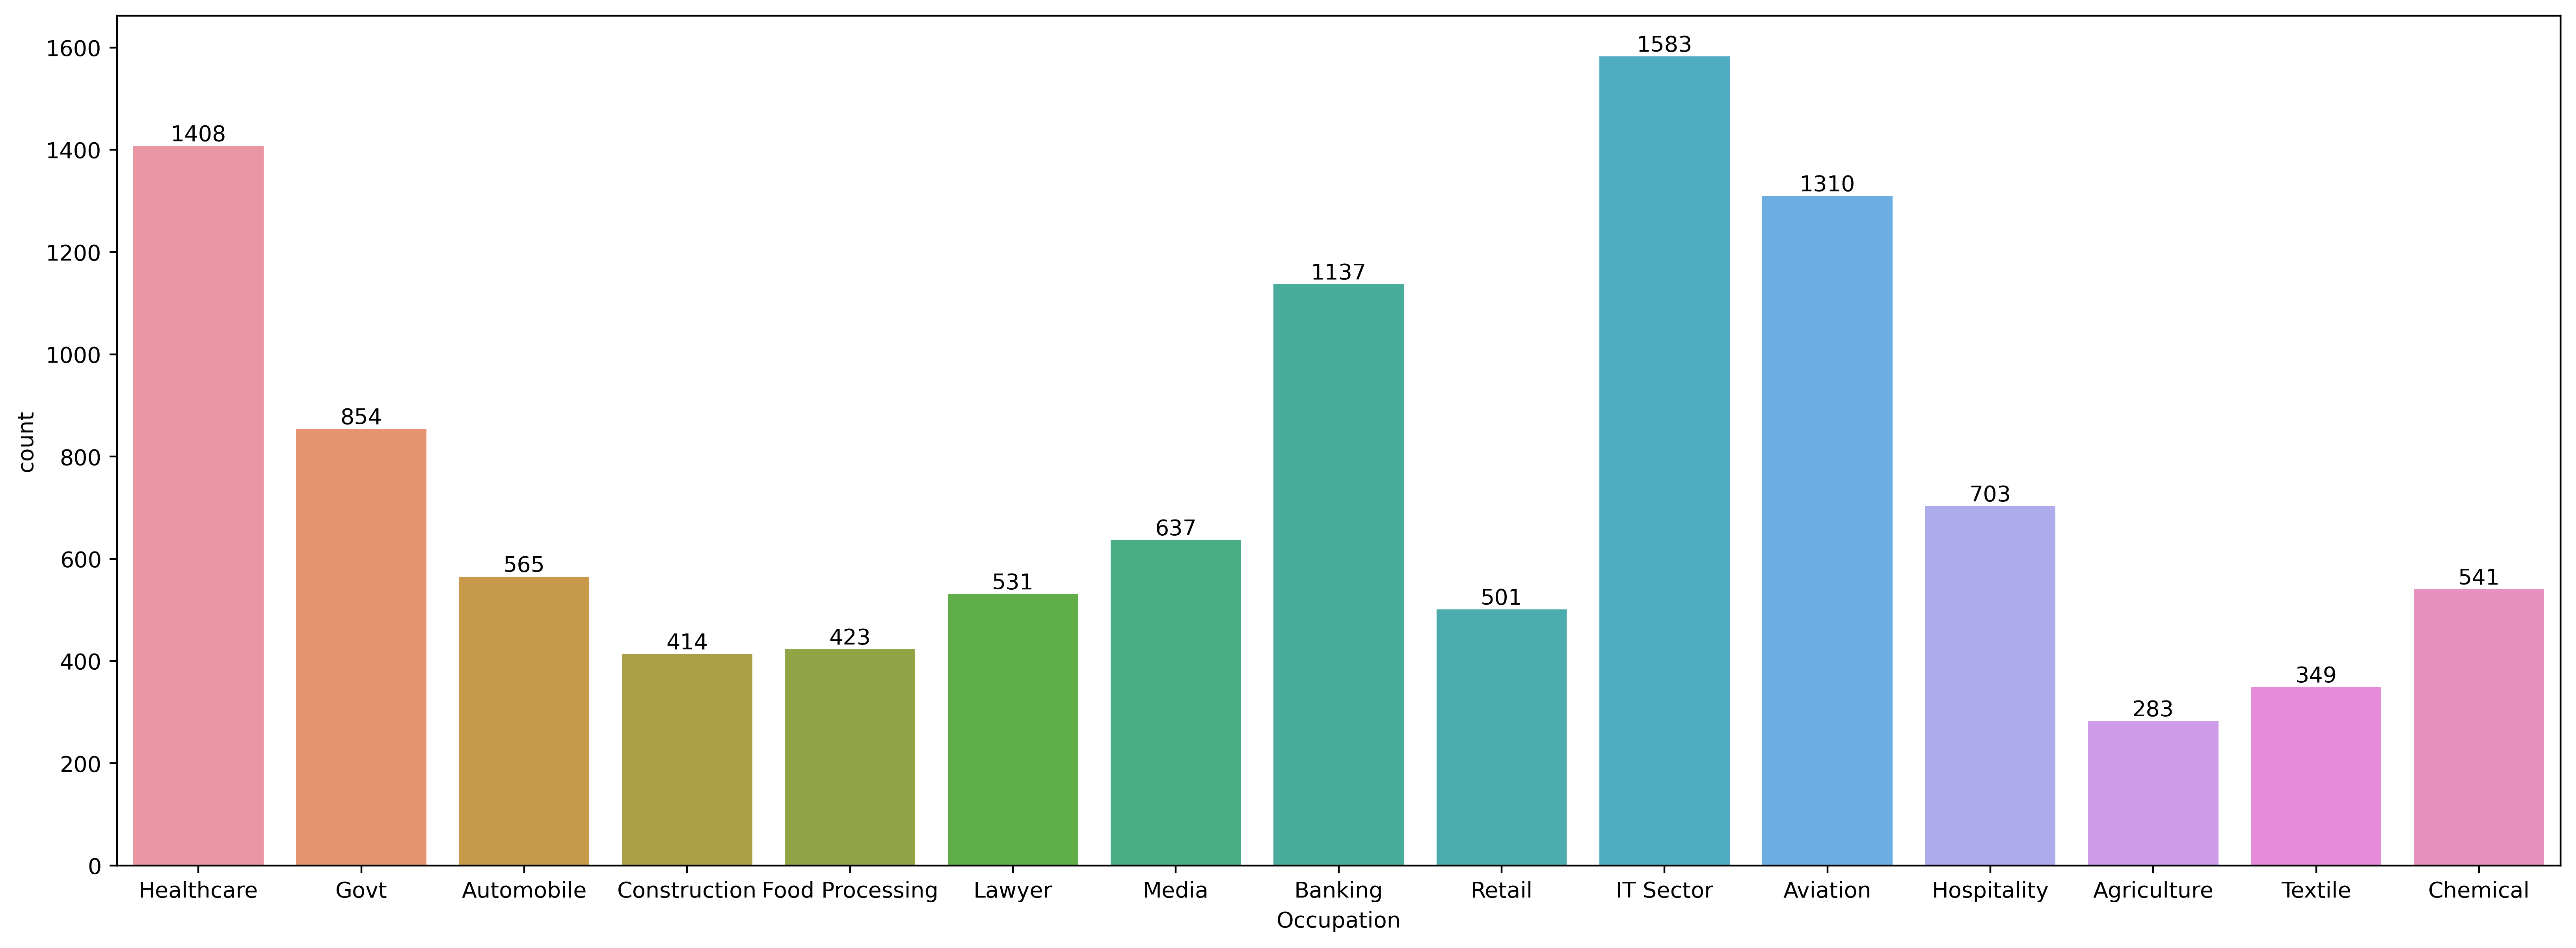

In [84]:
plt.figure(figsize=(20,7), dpi=400)
ax = sns.countplot(data=data,
                  x="Occupation"
                  )
for bar in ax.containers:
    ax.bar_label(bar)

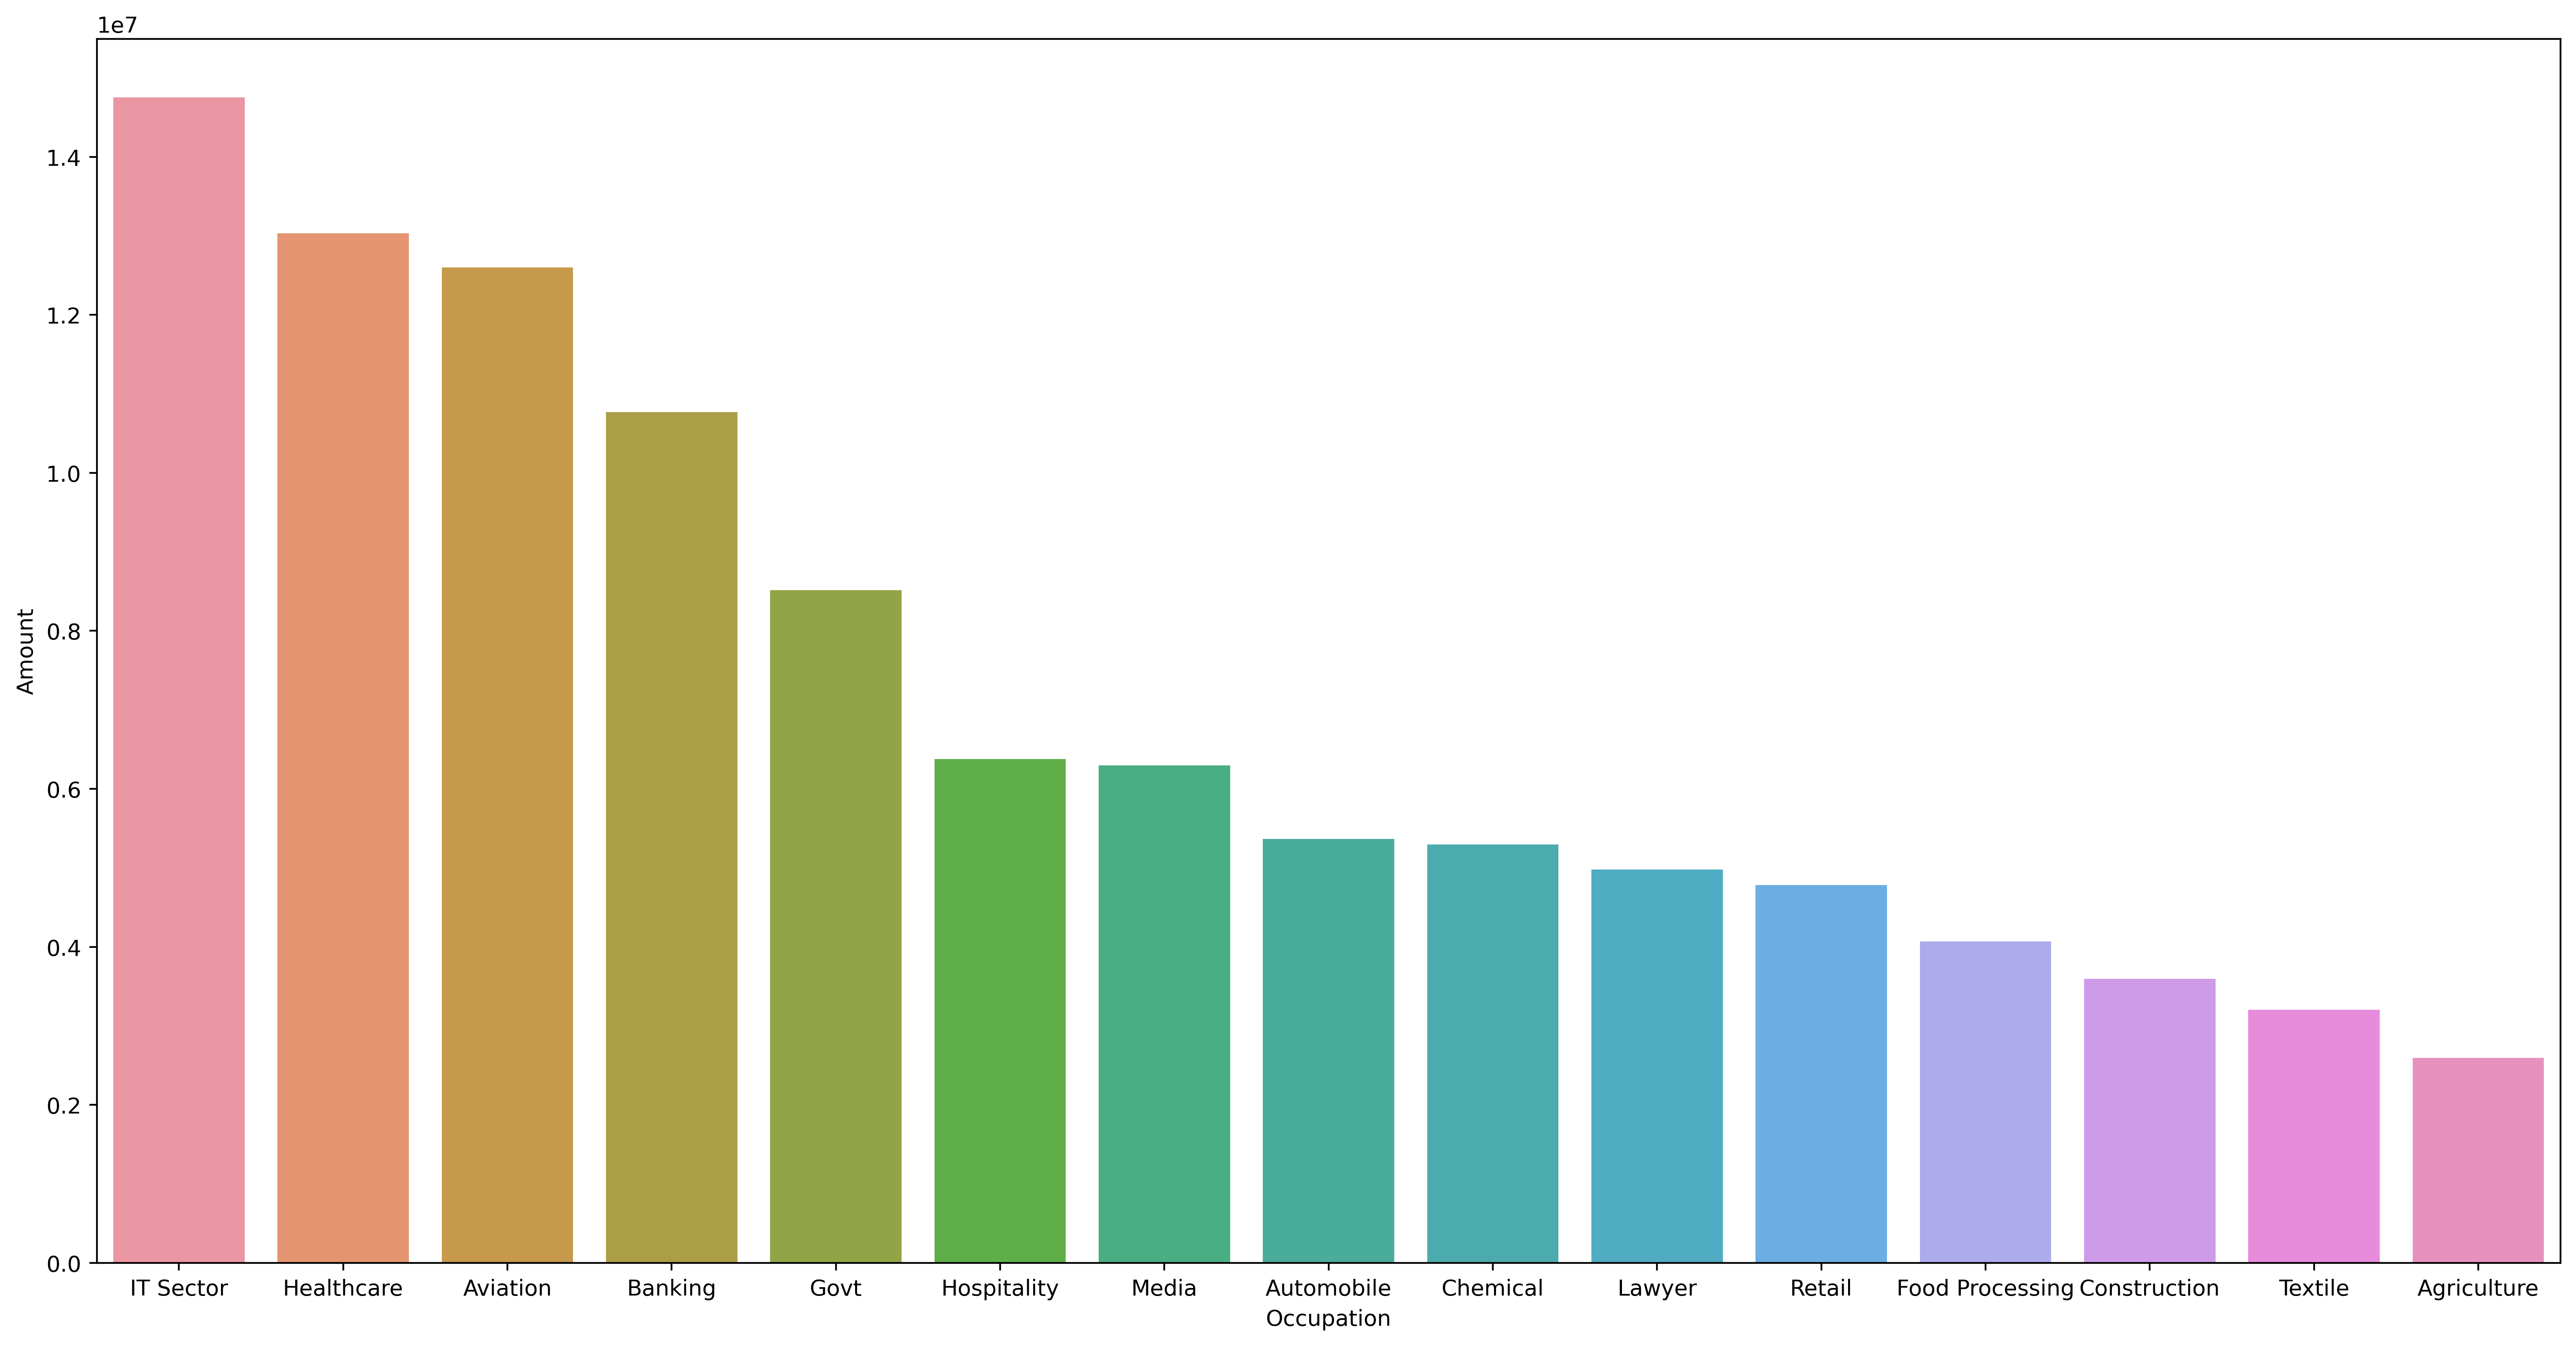

In [72]:
sales_occu = data.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
plt.figure(figsize=(20,10), dpi=400)
sns.barplot(data=sales_occu,
           x="Occupation",
            y="Amount"
           )
plt.show()

# Product category

In [69]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

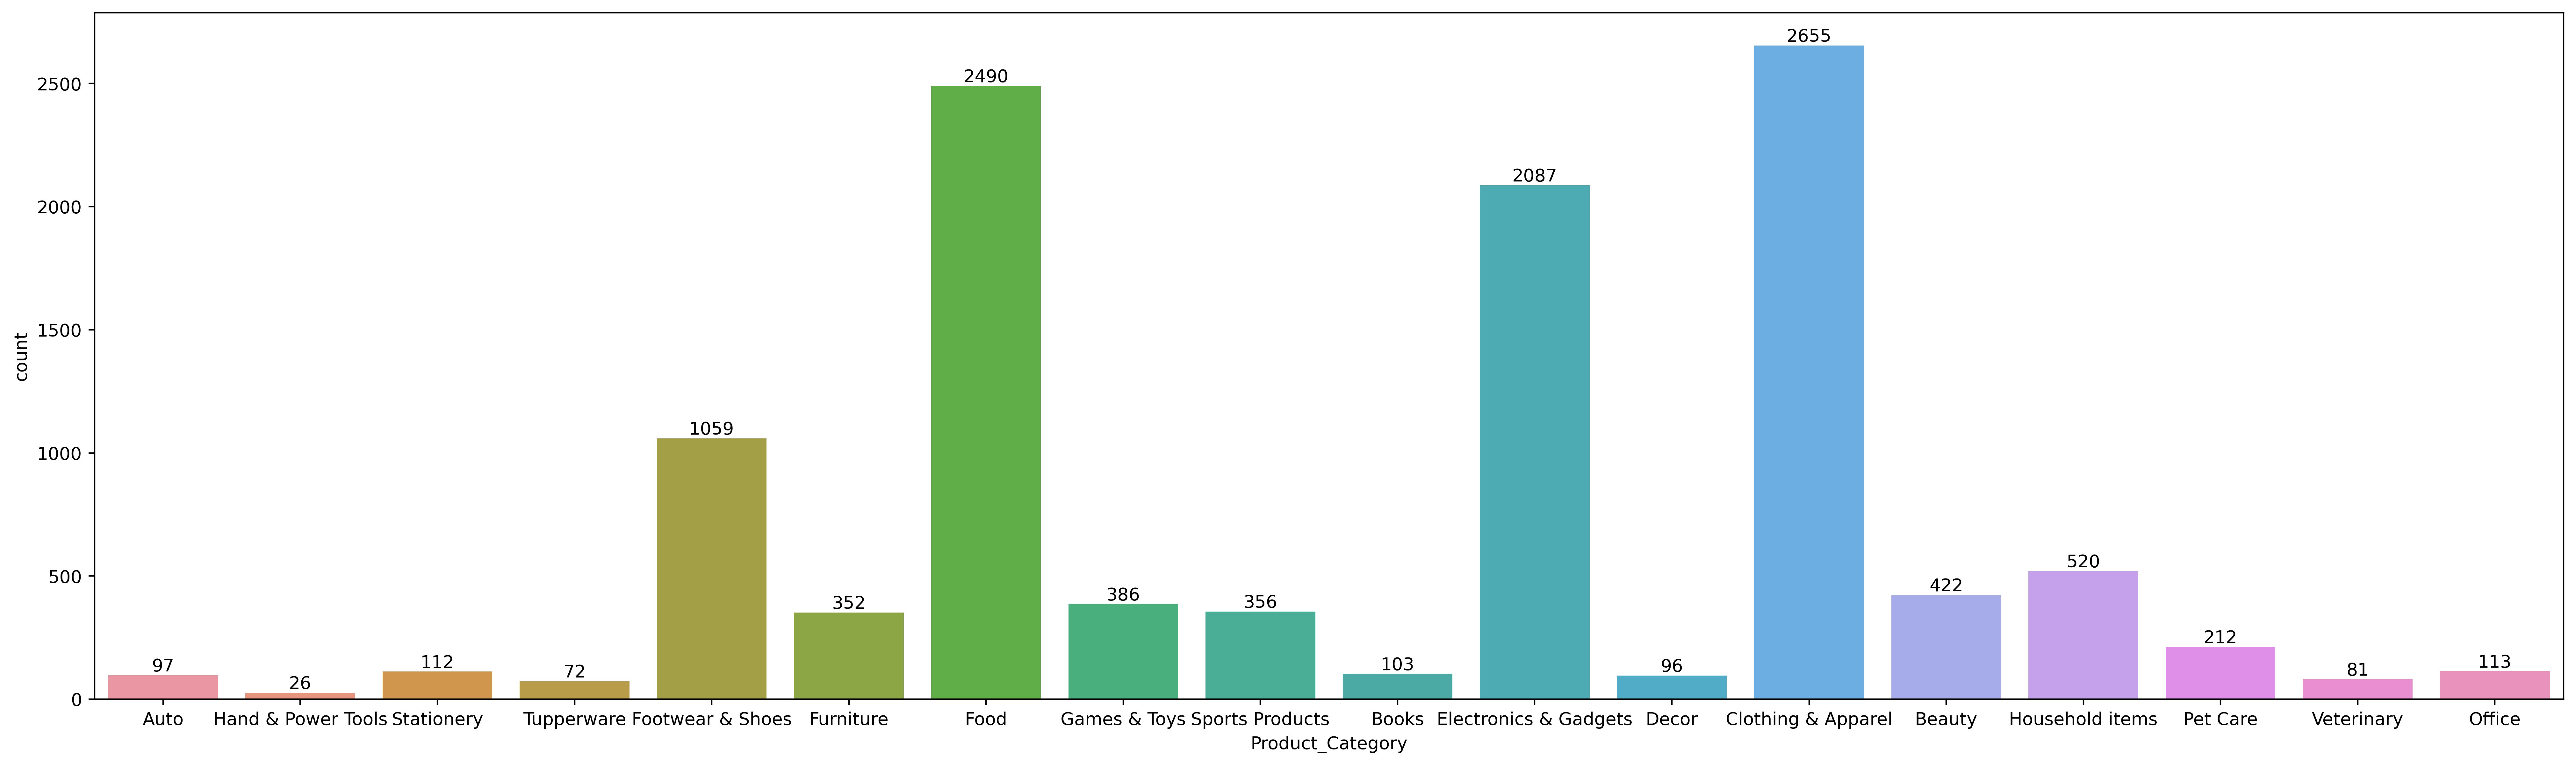

In [71]:
plt.figure(figsize=(25,7), dpi=400)
ax = sns.countplot(data=data,
                  x="Product_Category"
                  )
for bar in ax.containers:
    ax.bar_label(bar)

In [77]:
sales_prod = data.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
plt.figure(figsize=(35,10), dpi=500)
sns.barplot(data=sales_prod,
           x="Product_Category",
            y="Amount"
           )
plt.show()

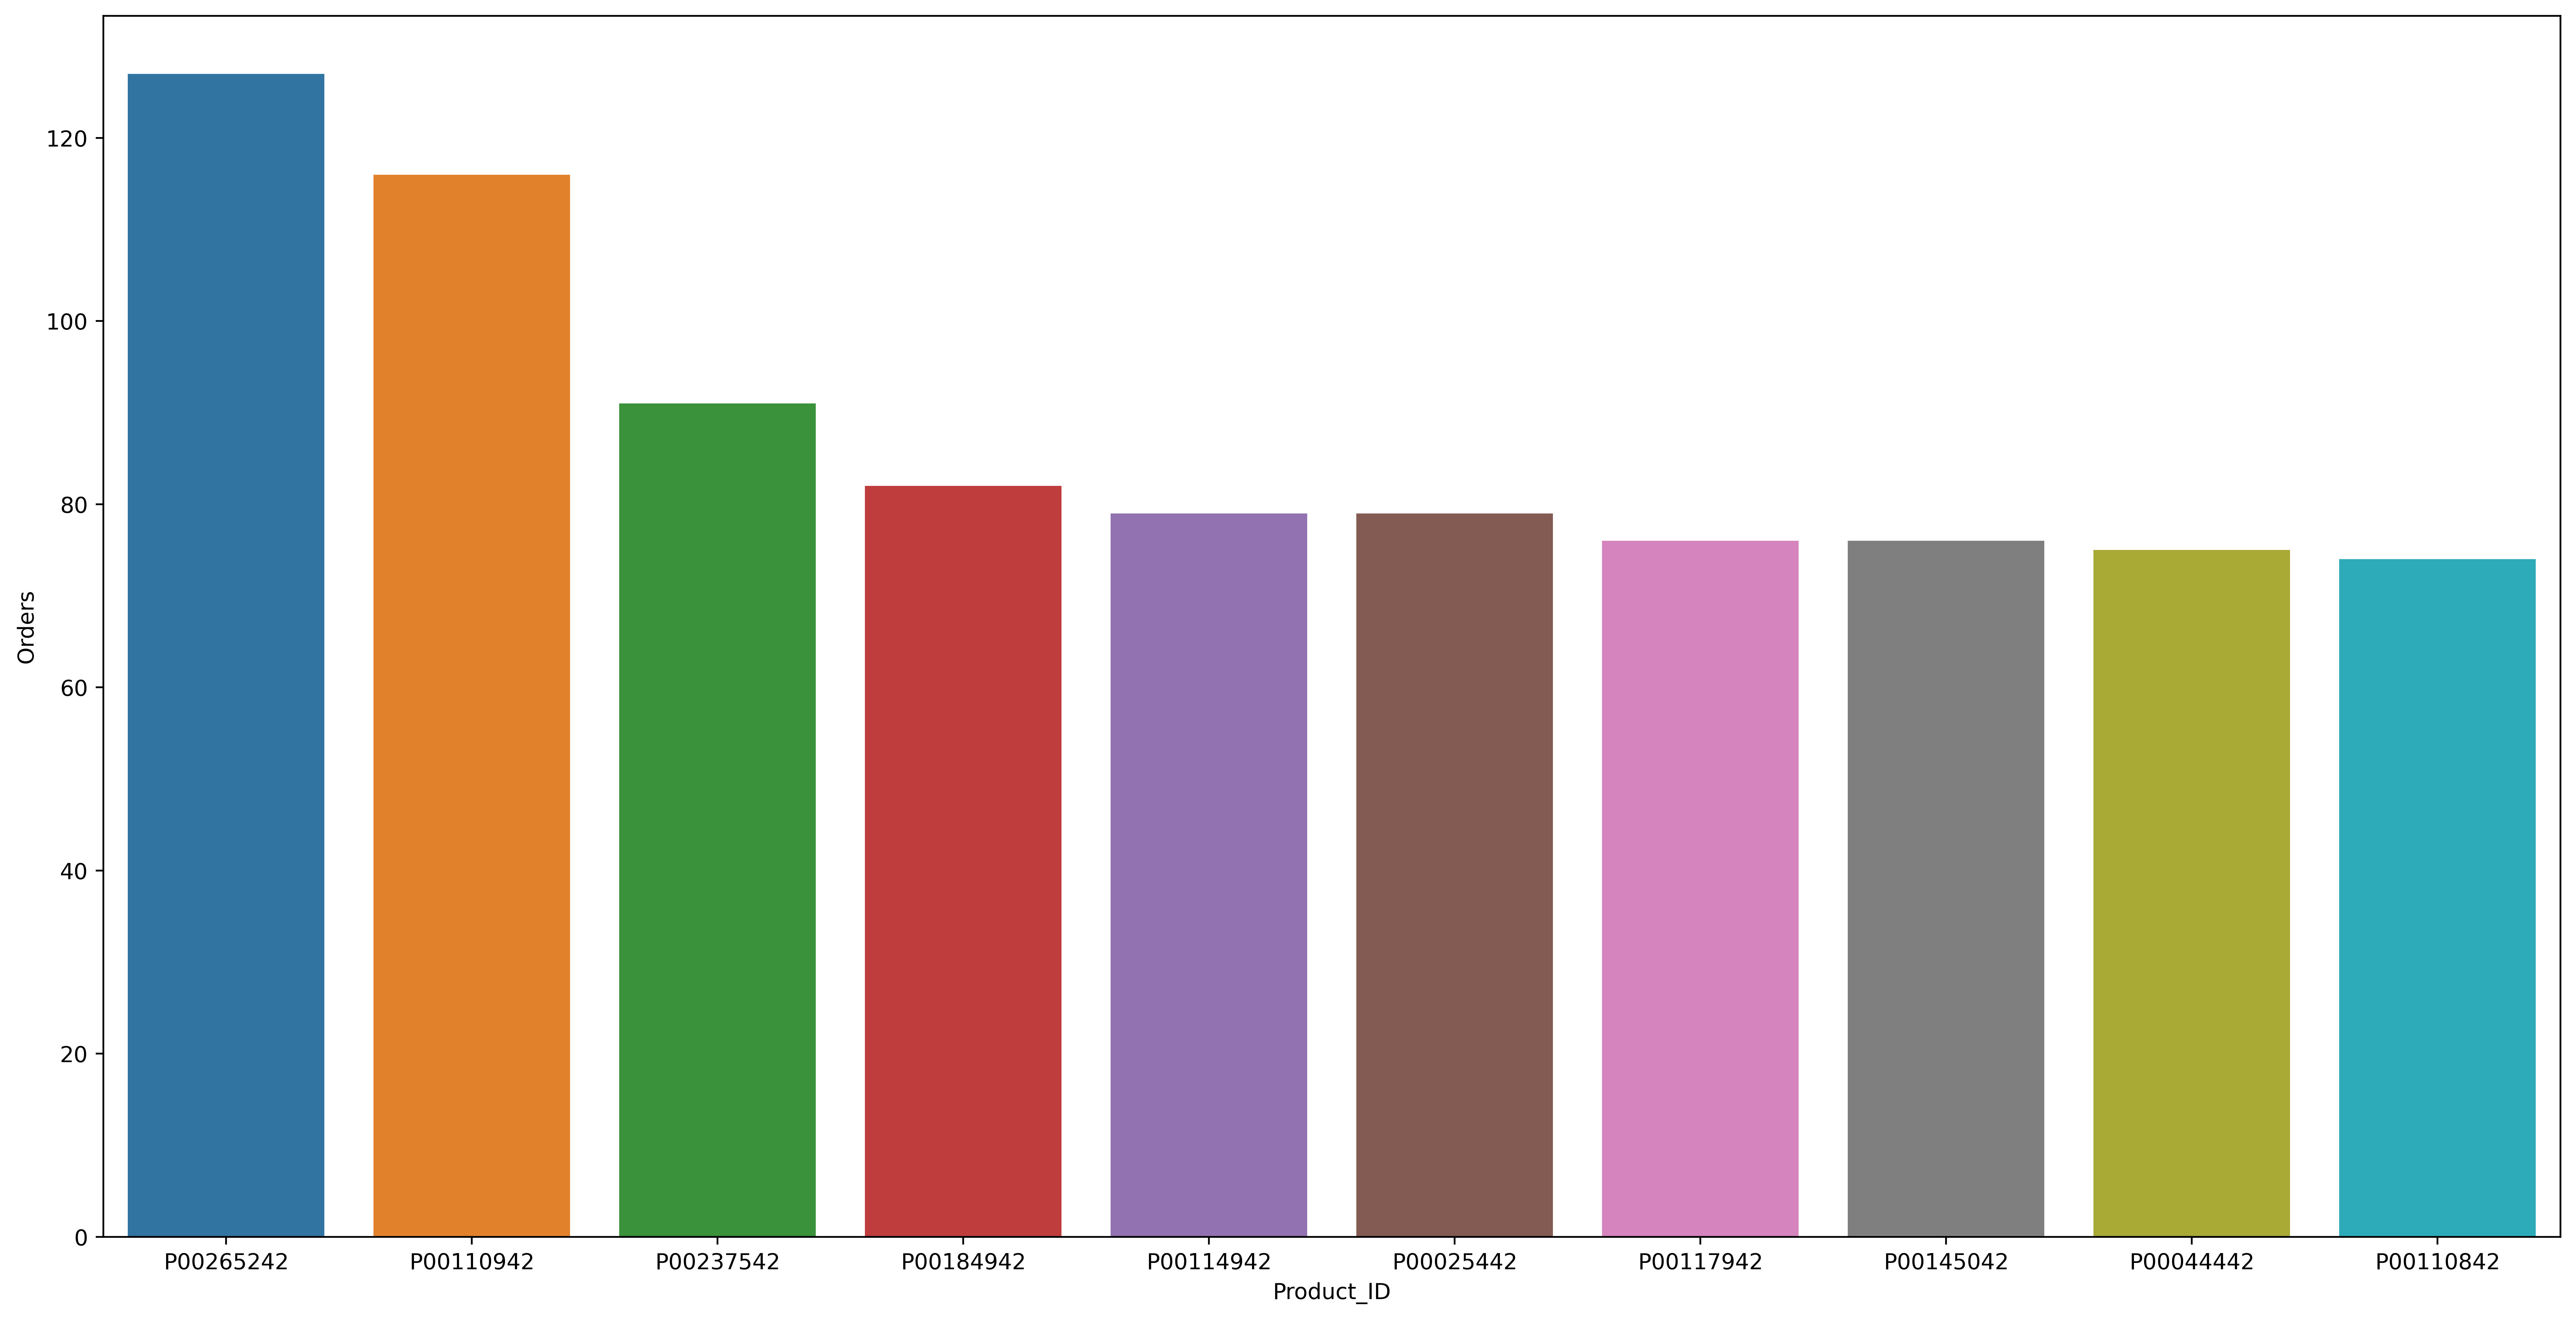

In [82]:
sales_prod = data.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
plt.figure(figsize=(20,10), dpi=500)
sns.barplot(data=sales_prod,
           x="Product_ID",
            y="Orders"
           )
plt.show()